# Apache PySpark by Example

## Install Spark

- Google colab recently made some changes which breaks the Spark installation.
- Please use the code below where we install from the pyspark package instead

In [115]:
%pip install pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
spark


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## (02-02) Download Chicago's Reported Crime Data

### Downloading and preprocessing Chicago's Reported Crime Data

In [6]:
%wget https://data.cityofchicago.org/api/views/ijzp-q8t2/rows.csv?accessType=DOWNLOAD

zsh:1: no matches found: https://data.cityofchicago.org/api/views/ijzp-q8t2/rows.csv?accessType=DOWNLOAD


NameError: name 'ls' is not defined

In [89]:
%ls -l

total 3769136
-rw-r--r--  1 pranavchoudhary  staff       77126 Aug 16 18:43 Apache_PySpark_by_Example.ipynb
-rw-r--r--  1 pranavchoudhary  staff         635 Aug 15 13:00 CONTRIBUTING.md
-rw-r--r--  1 pranavchoudhary  staff        6648 Aug 15 13:00 LICENSE
-rw-r--r--  1 pranavchoudhary  staff         617 Aug 15 13:00 NOTICE
-rw-r--r--  1 pranavchoudhary  staff        1218 Aug 15 13:00 README.md
-rw-r--r--@ 1 pranavchoudhary  staff  1920848630 Aug 16 17:02 reported-crimes.csv


In [11]:
%mv Crimes_-_2001_to_Present.csv reported-crimes.csv
%ls -l

total 3769056
-rw-r--r--  1 pranavchoudhary  staff       33677 Aug 15 13:00 Apache_PySpark_by_Example.ipynb
-rw-r--r--  1 pranavchoudhary  staff         635 Aug 15 13:00 CONTRIBUTING.md
-rw-r--r--  1 pranavchoudhary  staff        6648 Aug 15 13:00 LICENSE
-rw-r--r--  1 pranavchoudhary  staff         617 Aug 15 13:00 NOTICE
-rw-r--r--  1 pranavchoudhary  staff        1218 Aug 15 13:00 README.md
-rw-r--r--@ 1 pranavchoudhary  staff  1920848630 Aug 16 17:02 reported-crimes.csv


In [154]:
from pyspark.sql.functions import to_timestamp,col,lit
rc = spark.read.csv('reported-crimes.csv',header=True).withColumn('Date',to_timestamp(col('Date'),'MM/dd/yyyy hh:mm:ss a')).filter(col('Date') <= lit('2018-11-11'))
rc.show(5)

+--------+-----------+-------------------+------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+
|      ID|Case Number|               Date|             Block|IUCR|        Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|Latitude|Longitude|Location|
+--------+-----------+-------------------+------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+
| 5741943|   HN549294|2007-08-25 09:22:18|074XX N ROGERS AVE|0560|             ASSAULT|              SIMPLE|               OTHER| false|   false|2422|     024|  49|             1|     08A|     

## (03-03) Schemas

In [14]:
rc.printSchema()

root
 |-- ID: string (nullable = true)
 |-- Case Number: string (nullable = true)
 |-- Date: timestamp (nullable = true)
 |-- Block: string (nullable = true)
 |-- IUCR: string (nullable = true)
 |-- Primary Type: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Location Description: string (nullable = true)
 |-- Arrest: string (nullable = true)
 |-- Domestic: string (nullable = true)
 |-- Beat: string (nullable = true)
 |-- District: string (nullable = true)
 |-- Ward: string (nullable = true)
 |-- Community Area: string (nullable = true)
 |-- FBI Code: string (nullable = true)
 |-- X Coordinate: string (nullable = true)
 |-- Y Coordinate: string (nullable = true)
 |-- Year: string (nullable = true)
 |-- Updated On: string (nullable = true)
 |-- Latitude: string (nullable = true)
 |-- Longitude: string (nullable = true)
 |-- Location: string (nullable = true)



In [18]:
from pyspark.sql.types import StructType, StringType, DoubleType, BooleanType, StructField, TimestampType, IntegerType

In [19]:
rc.columns

['ID',
 'Case Number',
 'Date',
 'Block',
 'IUCR',
 'Primary Type',
 'Description',
 'Location Description',
 'Arrest',
 'Domestic',
 'Beat',
 'District',
 'Ward',
 'Community Area',
 'FBI Code',
 'X Coordinate',
 'Y Coordinate',
 'Year',
 'Updated On',
 'Latitude',
 'Longitude',
 'Location']

In [20]:
labels = [
 ('ID',StringType()),
 ('Case Number',StringType()),
 ('Date',TimestampType()),
 ('Block',StringType()),
 ('IUCR',StringType()),
 ('Primary Type',StringType()),
 ('Description',StringType()),
 ('Location Description',StringType()),
 ('Arrest',StringType()),
 ('Domestic',BooleanType()),
 ('Beat',StringType()),
 ('District',StringType()),
 ('Ward',StringType()),
 ('Community Area',StringType()),
 ('FBI Code',StringType()),
 ('X Coordinate',StringType()),
 ('Y Coordinate',StringType()),
 ('Year',IntegerType()),
 ('Updated On',StringType()),
 ('Latitude',DoubleType()),
 ('Longitude',DoubleType()),
 ('Location',StringType())
]

In [27]:
schema = StructType([
    StructField(
        x[0],x[1],True
    ) for x in labels
])
schema

StructType([StructField('ID', StringType(), True), StructField('Case Number', StringType(), True), StructField('Date', TimestampType(), True), StructField('Block', StringType(), True), StructField('IUCR', StringType(), True), StructField('Primary Type', StringType(), True), StructField('Description', StringType(), True), StructField('Location Description', StringType(), True), StructField('Arrest', StringType(), True), StructField('Domestic', BooleanType(), True), StructField('Beat', StringType(), True), StructField('District', StringType(), True), StructField('Ward', StringType(), True), StructField('Community Area', StringType(), True), StructField('FBI Code', StringType(), True), StructField('X Coordinate', StringType(), True), StructField('Y Coordinate', StringType(), True), StructField('Year', IntegerType(), True), StructField('Updated On', StringType(), True), StructField('Latitude', DoubleType(), True), StructField('Longitude', DoubleType(), True), StructField('Location', String

In [29]:
rc = spark.read.csv('reported-crimes.csv',schema = schema)
rc.printSchema()

root
 |-- ID: string (nullable = true)
 |-- Case Number: string (nullable = true)
 |-- Date: timestamp (nullable = true)
 |-- Block: string (nullable = true)
 |-- IUCR: string (nullable = true)
 |-- Primary Type: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Location Description: string (nullable = true)
 |-- Arrest: string (nullable = true)
 |-- Domestic: boolean (nullable = true)
 |-- Beat: string (nullable = true)
 |-- District: string (nullable = true)
 |-- Ward: string (nullable = true)
 |-- Community Area: string (nullable = true)
 |-- FBI Code: string (nullable = true)
 |-- X Coordinate: string (nullable = true)
 |-- Y Coordinate: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Updated On: string (nullable = true)
 |-- Latitude: double (nullable = true)
 |-- Longitude: double (nullable = true)
 |-- Location: string (nullable = true)



In [30]:
rc.show(5)

+--------+-----------+----+--------------------+----+------------+-------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|Date|               Block|IUCR|Primary Type|        Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+----+--------------------+----+------------+-------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|NULL|               Block|IUCR|Primary Type|        Description|Location Description|Arrest|    NULL|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|NULL|  

## (03-04) Working with columns

**Display only the first 5 rows of the column name IUCR**

In [31]:
rc.select('IUCR').show(5)

+----+
|IUCR|
+----+
|IUCR|
|0560|
|0110|
|0110|
|0620|
+----+
only showing top 5 rows



  **Display only the first 4 rows of the column names Case Number, Date and Arrest**

In [32]:
rc.select('Case Number','Date','Arrest').show(4)

+-----------+----+------+
|Case Number|Date|Arrest|
+-----------+----+------+
|Case Number|NULL|Arrest|
|   HN549294|NULL| false|
|   JE240540|NULL|  true|
|   JE279849|NULL|  true|
+-----------+----+------+
only showing top 4 rows



**Add a column with name One, with entries all 1s**

In [33]:
from pyspark.sql.functions import lit
rc = rc.withColumn('One',lit(1))
rc.show(5)

+--------+-----------+----+--------------------+----+------------+-------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+---+
|      ID|Case Number|Date|               Block|IUCR|Primary Type|        Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|One|
+--------+-----------+----+--------------------+----+------------+-------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+---+
|      ID|Case Number|NULL|               Block|IUCR|Primary Type|        Description|Location Description|Arrest|    NULL|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordi

**Remove the column IUCR**

In [38]:
rc = rc.drop('IUCR')
rc.show(5)

+--------+-----------+----+--------------------+------------+-------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+---+
|      ID|Case Number|Date|               Block|Primary Type|        Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|One|
+--------+-----------+----+--------------------+------------+-------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+---+
|      ID|Case Number|NULL|               Block|Primary Type|        Description|Location Description|Arrest|    NULL|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|NULL|          

## (03-05) Working with rows

**Add the reported crimes for an additional day, 12-Nov-2018, to our dataset.**

In [39]:
one_day = spark.read.csv('reported-crimes.csv',header=True).withColumn('Date',to_timestamp(col('Date'),'MM/dd/yyyy hh:mm:ss a')).filter(col('Date') == lit('2018-11-12'))
one_day.count()

4

In [40]:
one_day.show()

+--------+-----------+-------------------+-------------------+----+------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|               Date|              Block|IUCR|      Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+-------------------+-------------------+----+------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|13358766|   JH140578|2018-11-12 00:00:00|    008XX E 63RD ST|1153|DECEPTIVE PRACTICE|FINANCIAL IDENTIT...|           APARTMENT| false| 

In [41]:
rc.count()

8131950

In [44]:
rc.union(one_day)

DataFrame[ID: string, Case Number: string, Date: timestamp, Block: string, IUCR: string, Primary Type: string, Description: string, Location Description: string, Arrest: string, Domestic: string, Beat: string, District: string, Ward: string, Community Area: string, FBI Code: string, X Coordinate: string, Y Coordinate: string, Year: string, Updated On: string, Latitude: string, Longitude: string, Location: string]

In [45]:
rc.count()

6757222

In [48]:
rc = rc.union(one_day)
rc.count()

6757226

**What are the top 10 number of reported crimes by Primary type, in descending order of occurence?**

In [50]:
rc.columns

['ID',
 'Case Number',
 'Date',
 'Block',
 'IUCR',
 'Primary Type',
 'Description',
 'Location Description',
 'Arrest',
 'Domestic',
 'Beat',
 'District',
 'Ward',
 'Community Area',
 'FBI Code',
 'X Coordinate',
 'Y Coordinate',
 'Year',
 'Updated On',
 'Latitude',
 'Longitude',
 'Location']

In [56]:
rc.groupBy('Primary Type').count().orderBy('count',ascending = False).show(10)

+-------------------+-------+
|       Primary Type|  count|
+-------------------+-------+
|              THEFT|1418537|
|            BATTERY|1232296|
|    CRIMINAL DAMAGE| 771524|
|          NARCOTICS| 711780|
|      OTHER OFFENSE| 419050|
|            ASSAULT| 418523|
|           BURGLARY| 388040|
|MOTOR VEHICLE THEFT| 314135|
| DECEPTIVE PRACTICE| 267430|
|            ROBBERY| 255603|
+-------------------+-------+
only showing top 10 rows



## (03-06) Challenge

**What percentage of reported crimes resulted in an arrest?**

In [59]:
rc.show(5)

+--------+-----------+-------------------+------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+
|      ID|Case Number|               Date|             Block|IUCR|        Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|Latitude|Longitude|Location|
+--------+-----------+-------------------+------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+
| 5741943|   HN549294|2007-08-25 09:22:18|074XX N ROGERS AVE|0560|             ASSAULT|              SIMPLE|               OTHER| false|   false|2422|     024|  49|             1|     08A|     

In [60]:
rc.groupBy('Arrest').count().show()

+------+-------+
|Arrest|  count|
+------+-------+
| false|4881842|
|  true|1875384|
+------+-------+



In [65]:
rc.filter(col('Arrest') == 'true').count() / rc.select('Arrest').count()*100

27.75375575717018

  **What are the top 3 locations for reported crimes?**

In [61]:
rc.groupBy('Location Description').count().orderBy('count',ascending = False).show(3)

+--------------------+-------+
|Location Description|  count|
+--------------------+-------+
|              STREET|1770644|
|           RESIDENCE|1146477|
|           APARTMENT| 699355|
+--------------------+-------+
only showing top 3 rows



## (04-01) Built-in functions

In [66]:
from pyspark.sql import functions

In [67]:
print(dir(functions))

['Any', 'ArrayType', 'Callable', 'Column', 'DataFrame', 'DataType', 'Dict', 'Iterable', 'JVMView', 'List', 'Optional', 'PandasUDFType', 'PySparkTypeError', 'PySparkValueError', 'SparkContext', 'StringType', 'StructType', 'TYPE_CHECKING', 'Tuple', 'Type', 'Union', 'UserDefinedFunction', 'UserDefinedTableFunction', 'ValuesView', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', '_create_column_from_literal', '_create_lambda', '_create_py_udf', '_create_py_udtf', '_from_numpy_type', '_get_jvm_function', '_get_lambda_parameters', '_invoke_binary_math_function', '_invoke_function', '_invoke_function_over_columns', '_invoke_function_over_seq_of_columns', '_invoke_higher_order_function', '_options_to_str', '_test', '_to_java_column', '_to_seq', '_unresolved_named_lambda_variable', 'abs', 'acos', 'acosh', 'add_months', 'aes_decrypt', 'aes_encrypt', 'aggregate', 'any_value', 'approxCountDistinct', 'approx_count_distinct', 'approx_percentil

### String functions

**Display the Primary Type column in lower and upper characters, and the first 4 characters of the column**

In [77]:
from pyspark.sql.functions import lower,upper,substring
rc.select(lower('Primary Type')).show()

+--------------------+
| lower(Primary Type)|
+--------------------+
|             assault|
|               theft|
|offense involving...|
|offense involving...|
|offense involving...|
|criminal sexual a...|
|offense involving...|
|             robbery|
|offense involving...|
|offense involving...|
|  deceptive practice|
|  deceptive practice|
|               theft|
|               theft|
|  deceptive practice|
|  deceptive practice|
|             assault|
|offense involving...|
|offense involving...|
|offense involving...|
+--------------------+
only showing top 20 rows



In [71]:
rc.select(upper('Primary Type')).show()

+--------------------+
| upper(Primary Type)|
+--------------------+
|             ASSAULT|
|               THEFT|
|OFFENSE INVOLVING...|
|OFFENSE INVOLVING...|
|OFFENSE INVOLVING...|
|CRIMINAL SEXUAL A...|
|OFFENSE INVOLVING...|
|             ROBBERY|
|OFFENSE INVOLVING...|
|OFFENSE INVOLVING...|
|  DECEPTIVE PRACTICE|
|  DECEPTIVE PRACTICE|
|               THEFT|
|               THEFT|
|  DECEPTIVE PRACTICE|
|  DECEPTIVE PRACTICE|
|             ASSAULT|
|OFFENSE INVOLVING...|
|OFFENSE INVOLVING...|
|OFFENSE INVOLVING...|
+--------------------+
only showing top 20 rows



In [81]:
rc.select('Primary Type',substring(lower('Primary Type'),1,4)).show()

+--------------------+------------------------------------+
|        Primary Type|substring(lower(Primary Type), 1, 4)|
+--------------------+------------------------------------+
|             ASSAULT|                                assa|
|               THEFT|                                thef|
|OFFENSE INVOLVING...|                                offe|
|OFFENSE INVOLVING...|                                offe|
|OFFENSE INVOLVING...|                                offe|
|CRIMINAL SEXUAL A...|                                crim|
|OFFENSE INVOLVING...|                                offe|
|             ROBBERY|                                robb|
|OFFENSE INVOLVING...|                                offe|
|OFFENSE INVOLVING...|                                offe|
|  DECEPTIVE PRACTICE|                                dece|
|  DECEPTIVE PRACTICE|                                dece|
|               THEFT|                                thef|
|               THEFT|                  

### Numeric functions


**Show the oldest date and the most recent date**

In [82]:
from pyspark.sql.functions import min,max

In [85]:
rc.select(max('Date')).show()
rc.select(min('Date')).show()

+-------------------+
|          max(Date)|
+-------------------+
|2018-11-12 00:00:00|
+-------------------+



+-------------------+
|          min(Date)|
+-------------------+
|2001-01-01 00:00:00|
+-------------------+



### Date

**What is 3 days earlier that the oldest date and 3 days later than the most recent date?**

In [88]:
from pyspark.sql.functions import date_add,date_sub
rc.select(date_add(max('Date'),3),date_sub(min('Date'),3)).show()

+----------------------+----------------------+
|date_add(max(Date), 3)|date_sub(min(Date), 3)|
+----------------------+----------------------+
|            2018-11-15|            2000-12-29|
+----------------------+----------------------+



## (04-02) Working with dates

In [91]:
from pyspark.sql.functions import to_timestamp,to_date,lit

  **2019-12-25 13:30:00**

In [95]:
df = spark.createDataFrame([('2019-12-25 13:30:00',)],['Christmas'])
df.show()

+-------------------+
|          Christmas|
+-------------------+
|2019-12-25 13:30:00|
+-------------------+



In [98]:
df.select(to_date(col('Christmas'),'yyyy-MM-dd HH:mm:ss'),to_timestamp(col('Christmas'),'yyyy-MM-dd HH:mm:ss')).show()

+---------------------------------------+--------------------------------------------+
|to_date(Christmas, yyyy-MM-dd HH:mm:ss)|to_timestamp(Christmas, yyyy-MM-dd HH:mm:ss)|
+---------------------------------------+--------------------------------------------+
|                             2019-12-25|                         2019-12-25 13:30:00|
+---------------------------------------+--------------------------------------------+



**25/Dec/2019 13:30:00**

In [99]:

df = spark.createDataFrame([('25/Dec/2019 13:30:00',)],['Christmas'])
df.show()

+--------------------+
|           Christmas|
+--------------------+
|25/Dec/2019 13:30:00|
+--------------------+



In [101]:
df.select(to_date(col('Christmas'),'dd/MMM/yyyy HH:mm:ss'),to_timestamp(col('Christmas'),'dd/MMM/yyyy HH:mm:ss')).show()

+----------------------------------------+---------------------------------------------+
|to_date(Christmas, dd/MMM/yyyy HH:mm:ss)|to_timestamp(Christmas, dd/MMM/yyyy HH:mm:ss)|
+----------------------------------------+---------------------------------------------+
|                              2019-12-25|                          2019-12-25 13:30:00|
+----------------------------------------+---------------------------------------------+



**12/25/2019 01:30:00 PM**

In [106]:
df = spark.createDataFrame([('12/25/2019 01:30:00 PM',)],['Christmas'])
df.show(truncate=False)

+----------------------+
|Christmas             |
+----------------------+
|12/25/2019 01:30:00 PM|
+----------------------+



In [108]:
df.select(to_date(col('Christmas'),'MM/dd/yyyy hh:mm:ss a'),to_timestamp(col('Christmas'),'MM/dd/yyyy hh:mm:ss a')).show()

+-----------------------------------------+----------------------------------------------+
|to_date(Christmas, MM/dd/yyyy hh:mm:ss a)|to_timestamp(Christmas, MM/dd/yyyy hh:mm:ss a)|
+-----------------------------------------+----------------------------------------------+
|                               2019-12-25|                           2019-12-25 13:30:00|
+-----------------------------------------+----------------------------------------------+



In [110]:
nrc = spark.read.csv('reported-crimes.csv',header = True)
nrc.show(5,truncate=False)

+--------+-----------+----------------------+-------------------------+----+------------+-------------------------------------------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+----------------------+------------+-------------+-----------------------------+
|ID      |Case Number|Date                  |Block                    |IUCR|Primary Type|Description                                            |Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|Updated On            |Latitude    |Longitude    |Location                     |
+--------+-----------+----------------------+-------------------------+----+------------+-------------------------------------------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+----------------------+------------+-------------+--------------------

## (04-03) Joins

**Download police station data**

In [113]:
%ls -l

total 3751888
-rw-r--r--  1 pranavchoudhary  staff       83668 Aug 16 19:07 Apache_PySpark_by_Example.ipynb
-rw-r--r--  1 pranavchoudhary  staff         635 Aug 15 13:00 CONTRIBUTING.md
-rw-r--r--  1 pranavchoudhary  staff        6648 Aug 15 13:00 LICENSE
-rw-r--r--  1 pranavchoudhary  staff         617 Aug 15 13:00 NOTICE
-rw-r--r--@ 1 pranavchoudhary  staff        5699 Aug 17 10:29 Police_Stations_20240817.csv
-rw-r--r--  1 pranavchoudhary  staff        1218 Aug 15 13:00 README.md
-rw-r--r--@ 1 pranavchoudhary  staff  1920848630 Aug 16 17:02 reported-crimes.csv


In [123]:
ps = spark.read.csv('police-stations.csv',header=True)
ps.show(5,truncate=False)

+------------+-------------+-------------------+-------+-----+-----+----------------------------------------------------------------------------+------------+------------+------------+------------+------------+-----------+------------+-------------------------------+
|DISTRICT    |DISTRICT NAME|ADDRESS            |CITY   |STATE|ZIP  |WEBSITE                                                                     |PHONE       |FAX         |TTY         |X COORDINATE|Y COORDINATE|LATITUDE   |LONGITUDE   |LOCATION                       |
+------------+-------------+-------------------+-------+-----+-----+----------------------------------------------------------------------------+------------+------------+------------+------------+------------+-----------+------------+-------------------------------+
|Headquarters|Headquarters |3510 S Michigan Ave|Chicago|IL   |60653|http://home.chicagopolice.org                                               |NULL        |NULL        |NULL        |1177731.401 

**The reported crimes dataset has only the district number. Add the district name by joining with the police station dataset**

In [124]:
rc.show(5)

+--------+-----------+-------------------+------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+
|      ID|Case Number|               Date|             Block|IUCR|        Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|Latitude|Longitude|Location|
+--------+-----------+-------------------+------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+
| 5741943|   HN549294|2007-08-25 09:22:18|074XX N ROGERS AVE|0560|             ASSAULT|              SIMPLE|               OTHER| false|   false|2422|     024|  49|             1|     08A|     

In [143]:
rc.unpersist()

DataFrame[ID: string, Case Number: string, Date: timestamp, Block: string, IUCR: string, Primary Type: string, Description: string, Location Description: string, Arrest: string, Domestic: string, Beat: string, District: string, Ward: string, Community Area: string, FBI Code: string, X Coordinate: string, Y Coordinate: string, Year: string, Updated On: string, Latitude: string, Longitude: string, Location: string]

In [141]:
spark.catalog.clearCache()

In [145]:
ps.select('District').distinct().show(30)

+--------------------+
|            District|
+--------------------+
|                   7|
|                  15|
|                  11|
|                   3|
|                   8|
|                  22|
|                  16|
|                   5|
|                  18|
|                  17|
|                   6|
|                  19|
|                  25|
|        Headquarters|
|                  24|
|                   9|
|                   1|
|                  20|
|                  10|
|                   4|
|                  12|
|                  14|
|                   2|
|",Chicago,IL,6060...|
+--------------------+



In [150]:
import gc

# Unpersist the DataFrame if necessary
# rc.unpersist()

# # Delete the reference
# del rc

# # Force garbage collection
gc.collect()


10

In [158]:
import psutil
from pyspark.sql import SparkSession

# Initialize Spark Session
spark = SparkSession.builder.appName("Memory Check").getOrCreate()

# Check the free memory on the driver node
memory_info = psutil.virtual_memory()
available_memory_gb = memory_info.available / (1024 ** 3)

print(f"Available Memory on Driver: {available_memory_gb:.2f} GB")


Available Memory on Driver: 2.66 GB


In [159]:
spark.catalog.clearCache()

In [160]:
ps.select('District').distinct().show(30,truncate=False)


+--------------------+
|            District|
+--------------------+
|                   7|
|                  15|
|                  11|
|                   3|
|                   8|
|                  22|
|                  16|
|                   5|
|                  18|
|                  17|
|                   6|
|                  19|
|                  25|
|        Headquarters|
|                  24|
|                   9|
|                   1|
|                  20|
|                  10|
|                   4|
|                  12|
|                  14|
|                   2|
|",Chicago,IL,6060...|
+--------------------+



+--------+
|District|
+--------+
|     009|
|     012|
|     024|
|     031|
|     015|
|     006|
|     019|
|     020|
|     011|
|     025|
|     005|
|     003|
|     016|
|     018|
|     008|
|     022|
|     001|
|     014|
|     010|
|     004|
|     017|
|     007|
|     002|
|     021|
|    NULL|
+--------+



In [3]:
rc.select('Format District').distinct().show(30,truncate=False)

NameError: name 'rc' is not defined

In [161]:
from pyspark.sql.functions import lpad

In [163]:
ps.select(lpad(col('District'),3,'0')).show(30)

+--------------------+
|lpad(District, 3, 0)|
+--------------------+
|                 Hea|
|                 018|
|                 019|
|                 020|
|                 022|
|                 024|
|                 025|
|                 001|
|                 002|
|                 003|
|                 004|
|                 005|
|                 006|
|                 007|
|                 008|
|                 009|
|                 010|
|                 011|
|                 012|
|                 ",C|
|                 014|
|                 015|
|                 016|
|                 017|
+--------------------+



In [ ]:
ps = ps.withColumn('Format District',lpad(col('District'),3,'0'))
ps.show(5)

+------------+-------------+-------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+---------------+
|    DISTRICT|DISTRICT NAME|            ADDRESS|   CITY|STATE|  ZIP|             WEBSITE|       PHONE|         FAX|         TTY|X COORDINATE|Y COORDINATE|   LATITUDE|   LONGITUDE|            LOCATION|Format District|
+------------+-------------+-------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+---------------+
|Headquarters| Headquarters|3510 S Michigan Ave|Chicago|   IL|60653|http://home.chica...|        NULL|        NULL|        NULL| 1177731.401| 1881697.404|41.83070169|-87.62339535|(41.8307016873, -...|            Hea|
|          18|   Near North| 1160 N Larrabee St|Chicago|   IL|60610|http://home.chica...|312-742-5870|312-742-5771|312-742-5773| 117

In [ ]:
rc.join(ps, rc["District"] == ps["Format District"], 'leftouter').show(30,truncate=False)

24/08/17 11:08:26 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+--------+-----------+-------------------+-----------------------------------+----+--------------------------+---------------------------------------------------+--------------------------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+----------------------+------------+-------------+-----------------------------+--------+--------------+------------------------+-------+-----+-----+------------------------------------------------------------------------------+------------+------------+------------+------------+------------+-----------+------------+-------------------------------+---------------+
|ID      |Case Number|Date               |Block                              |IUCR|Primary Type              |Description                                        |Location Description                  |Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|Updated On            |Latitude    |Longitude    |L

In [172]:
ps.columns

['DISTRICT',
 'DISTRICT NAME',
 'ADDRESS',
 'CITY',
 'STATE',
 'ZIP',
 'WEBSITE',
 'PHONE',
 'FAX',
 'TTY',
 'X COORDINATE',
 'Y COORDINATE',
 'LATITUDE',
 'LONGITUDE',
 'LOCATION',
 'Format District']

In [173]:
ps.drop(
    'ADDRESS',
 'CITY',
 'STATE',
 'ZIP',
 'WEBSITE',
 'PHONE',
 'FAX',
 'TTY',
 'X COORDINATE',
 'Y COORDINATE',
 'LATITUDE',
 'LONGITUDE',
 'LOCATION',
 'Format District'
)


DataFrame[DISTRICT: string, DISTRICT NAME: string]

In [174]:
ps = ps.withColumn('Format District',lpad(col('District'),3,'0'))

In [180]:
rc.join(ps, rc["District"] == ps["Format District"],'leftouter').show(20)

+--------+-----------+-------------------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+--------+-------------+---------------+
|      ID|Case Number|               Date|               Block|IUCR|        Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|DISTRICT|DISTRICT NAME|Format District|
+--------+-----------+-------------------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+--------+-------------+---------------+
| 5741943|

In [178]:
ps = ps.drop(
'ADDRESS',
 'CITY',
 'STATE',
 'ZIP',
 'WEBSITE',
 'PHONE',
 'FAX',
 'TTY',
 'X COORDINATE',
 'Y COORDINATE',
 'LATITUDE',
 'LONGITUDE',
 'LOCATION',
)

## (04-05) Challenge questions

**What is the most frequently reported non-criminal activity?**

In [204]:
nc = rc.filter(rc["Primary Type"].like("NON%"))

In [205]:
nc.groupBy(nc["Description"]).count().orderBy('count',ascending = False).show(truncate=False)

+-------------------------------------------+-----+
|Description                                |count|
+-------------------------------------------+-----+
|LOST PASSPORT                              |107  |
|FOID - REVOCATION                          |75   |
|NOTIFICATION OF CIVIL NO CONTACT ORDER     |9    |
|NOTIFICATION OF STALKING - NO CONTACT ORDER|8    |
|FOUND PASSPORT                             |4    |
|CONCEALED CARRY LICENSE REVOCATION         |4    |
|GUN OFFENDER NOTIFICATION-NO CONTACT       |3    |
+-------------------------------------------+-----+



**Using a bar chart, plot which day of the week has the most number of reported crime.**

In [215]:
from pyspark.sql.functions import dayofweek,date_format

In [217]:
rc = rc.drop('DayOfWeek')

In [224]:
rc.select('Date',dayofweek('Date'),date_format('Date','E'))

+-------------------+---------------+--------------------+
|               Date|dayofweek(Date)|date_format(Date, E)|
+-------------------+---------------+--------------------+
|2007-08-25 09:22:18|              7|                 Sat|
|2002-01-05 21:24:00|              7|                 Sat|
|2011-08-10 00:01:00|              4|                 Wed|
|2015-09-24 00:00:00|              5|                 Thu|
|2014-09-07 00:00:00|              1|                 Sun|
+-------------------+---------------+--------------------+
only showing top 5 rows



In [225]:
rc = rc.withColumn('DayOfWeek',date_format('Date','E'))

In [227]:
rc.groupBy(rc["DayOfWeek"]).count().show(truncate=False)

+---------+-------+
|DayOfWeek|count  |
+---------+-------+
|Sun      |912503 |
|Mon      |953317 |
|Thu      |965182 |
|Sat      |965646 |
|Wed      |974443 |
|Fri      |1017532|
|Tue      |968599 |
+---------+-------+



In [ ]:
cnt = [x[1] for x in (rc.groupBy(rc["DayOfWeek"]).count().collect())]
cnt

In [230]:
dow = [x[0] for x in (rc.groupBy(rc["DayOfWeek"]).count().collect())]
dow

['Sun', 'Mon', 'Thu', 'Sat', 'Wed', 'Fri', 'Tue']

In [240]:
import pandas as pd
import matplotlib.pyplot as plt

<Axes: xlabel='Day_Of_Week'>

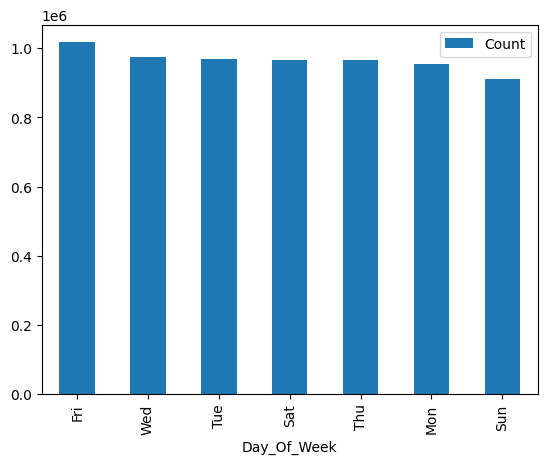

In [247]:
df = pd.DataFrame({'Day_Of_Week' : dow, 'Count' : cnt })
df.sort_values('Count',ascending=False).plot(kind = 'bar',x='Day_Of_Week',y='Count')

## (05-01) RDDs setup

**How many police stations are there?**

**Display the District ID, District name, Address and Zip for the police station with District ID 7**



**Police stations 10 and 11 are geographically close to each other. Display the District ID, District name, address and zip code**